<center><h1>Qi_Hui_HW7</h1></center>

Name: Hui Qi
<br>
Github Username: yufeifeiqiqi
<br>
USC ID: 3206742781

### I want to use one late day of my remaining four late days.

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [104]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

### (a) Download the Anuran Calls (MFCCs) Data Set

In [11]:
df = pd.read_csv('../data/Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


Families:<br>
	 Bufonidae              68 <br>
     Dendrobatidae         542 <br>
     Hylidae              2165 <br>
     Leptodactylidae      4420 

In [26]:
df['Family'], family_labels = pd.factorize(df['Family'])
df['Family'].value_counts()

0    4420
2    2165
1     542
3      68
Name: Family, dtype: int64

Genus:<br>
     Adenomera          4150 <br>
     Ameerega            542 <br>
     Dendropsophus       310 <br>
     Hypsiboas          1593 <br>
     Leptodactylus       270 <br>
     Osteocephalus       114 <br>
     Rhinella             68 <br>
     Scinax              148 <br>

In [27]:
df['Genus'], genus_labels = pd.factorize(df['Genus'])
df['Genus'].value_counts()

0    4150
3    1593
1     542
2     310
4     270
7     148
5     114
6      68
Name: Genus, dtype: int64

Species:<br>
     AdenomeraAndre             672 <br>
     AdenomeraHylaedact…       3478 <br>
     Ameeregatrivittata         542 <br>
     HylaMinuta                 310 <br>
     HypsiboasCinerascens       472 <br>
     HypsiboasCordobae         1121 <br>
     LeptodactylusFuscus        270 <br>
     OsteocephalusOopha…        114 <br>
     Rhinellagranulosa           68 <br>
     ScinaxRuber                148 

In [29]:
df['Species'], species_labels = pd.factorize(df['Species'])
df['Species'].value_counts()

2    3478
5    1121
0     672
1     542
4     472
3     310
6     270
9     148
7     114
8      68
Name: Species, dtype: int64

In [30]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0,0,0,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0,0,0,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0,0,0,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0,0,0,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,2,7,9,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,2,7,9,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,2,7,9,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,2,7,9,60


In [31]:
X_df = df.iloc[:, :22]
y_df = df.iloc[:, 22:-1]
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=200)
X_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
955,1.0,0.331864,-0.127048,0.151166,0.353237,0.154796,-0.113095,-0.020795,0.165342,0.124538,...,0.012429,0.255206,0.167376,-0.036879,-0.112113,-0.000060,0.012309,-0.048583,-0.091919,0.007747
289,1.0,0.186151,-0.104279,0.110313,0.359544,0.240316,0.000251,-0.021573,0.103022,0.012273,...,0.064846,0.331710,0.280686,-0.072679,-0.284976,-0.182422,0.121780,0.243282,0.060211,-0.107691
2292,1.0,0.053211,0.023168,0.564388,0.277555,-0.014813,-0.251973,-0.011704,0.225531,0.069873,...,0.336403,-0.110932,-0.207788,0.134472,0.239956,-0.025565,-0.151613,-0.128685,0.138554,0.203218
6640,1.0,0.430493,0.780517,0.184071,-0.182634,0.304560,0.177008,-0.195103,0.127948,0.234626,...,0.074156,0.098544,-0.074153,-0.010273,0.112661,-0.049856,-0.031988,0.053673,0.009977,-0.036831
6186,1.0,0.722722,0.487404,0.234854,-0.005108,0.221692,0.071199,-0.022700,0.180188,0.129845,...,0.099340,-0.027376,0.020087,0.062955,-0.028589,0.001775,0.037913,-0.071512,-0.006714,0.041393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,1.0,0.359253,0.184376,0.551780,0.161344,-0.038295,-0.154099,0.091402,0.286419,0.069743,...,0.355019,0.008875,-0.254938,0.013094,0.141007,0.049128,-0.055475,-0.166848,-0.018739,0.173153
5956,1.0,0.056584,0.404983,0.357513,0.182499,0.255346,0.120189,-0.164769,-0.038981,0.079540,...,0.085855,-0.011036,-0.094305,0.002629,0.127632,0.030930,-0.023085,0.025457,-0.028528,-0.001031
784,1.0,0.096090,0.049396,0.372665,0.316052,0.224246,-0.110088,-0.170532,0.110709,0.209299,...,-0.179154,0.147199,0.319538,0.017799,-0.229211,-0.117848,0.061621,0.064964,0.039030,-0.037281
4713,1.0,0.140983,0.205269,0.559442,0.250732,-0.019940,-0.132835,-0.051244,0.214492,0.198192,...,0.169255,0.218940,-0.132570,-0.144224,0.045600,0.102103,0.025551,-0.046166,-0.077805,0.008330


In [32]:
y_train

,Family,Genus,Species
955,1,1,1
289,0,0,0
2292,0,0,2
6640,0,4,6
6186,2,3,5
...,...,...,...
2858,0,0,2
5956,2,3,5
784,1,1,1
4713,2,2,3


### (b) Train a classifier for each label

#### (i) Research

see https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

#### (ii) Train a SVM for each of the labels

In [33]:
y1_train = y_train['Family']
y2_train = y_train['Genus']
y3_train = y_train['Species']

y1_test = y_test['Family']
y2_test = y_test['Genus']
y3_test = y_test['Species']

In [40]:
# https://github.com/Ajayay/SVM_on_AFFR/blob/master/SVM_on_AFFR.ipynb
# https://scikit-learn.sourceforge.net/dev/modules/generated/sklearn.svm.SVC.html

c_range = [10**c for c in np.arange(-3,3, dtype=float)]
gamma_range = np.arange(0.1, 1.1, 0.1)

clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':gamma_range,
             'C':c_range , 'decision_function_shape': ['ovr'], 'random_state':[200], 'max_iter':[3000]}]
gsv = GridSearchCV(clf, param_grid,cv=10, n_jobs=-1)

In [41]:
# family 
warnings.filterwarnings('ignore')

gsvf = gsv.fit(X_train, y1_train)
print("Best HyperParameter: ",gsvf.best_params_)

/Users/huiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/huiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/huiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/huiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/huiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:

/Users/huiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/huiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/huiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/huiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/huiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:

Best HyperParameter:  {'C': 100.0, 'decision_function_shape': 'ovr', 'gamma': 1.0, 'kernel': 'rbf', 'max_iter': 3000, 'random_state': 200}


In [44]:
y1_test

4619    0
1665    0
4527    0
7112    2
391     0
       ..
3427    0
6153    2
1395    0
7164    2
4895    2
Name: Family, Length: 2159, dtype: int64

In [50]:
# build a model with C:100 gamma: 1
gsv_model1 = SVC(C=100, gamma=1,kernel='rbf', random_state=200, decision_function_shape = 'ovr').fit(X_train, y1_train)
# predic the class result for Families label
y1_predict = pd.DataFrame(gsv_model1.predict(X_test))


In [51]:
# genus
gsvg = gsv.fit(X_train, y2_train)
print("Best HyperParameter: ",gsvg.best_params_)

Best HyperParameter:  {'C': 100.0, 'decision_function_shape': 'ovr', 'gamma': 0.9, 'kernel': 'rbf', 'max_iter': 3000, 'random_state': 200}


In [52]:
# build a model with C:100 gamma: 0.9
gsv_model1 = SVC(C=100, gamma=0.9, kernel='rbf', random_state=200, decision_function_shape = 'ovr').fit(X_train, y2_train)
# predic the class result for Families label
y2_predict = pd.DataFrame(gsv_model1.predict(X_test))

In [53]:
# species
gsvs = gsv.fit(X_train, y3_train)
print("Best HyperParameter: ",gsvs.best_params_)

Best HyperParameter:  {'C': 100.0, 'decision_function_shape': 'ovr', 'gamma': 1.0, 'kernel': 'rbf', 'max_iter': 3000, 'random_state': 200}


In [54]:
# build a model with C:100 gamma: 1
gsv_model1 = SVC(C=100, gamma=1, kernel='rbf', random_state=200, decision_function_shape = 'ovr').fit(X_train, y3_train)
# predic the class result for Families label
y3_predict = pd.DataFrame(gsv_model1.predict(X_test))


In [83]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
# https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

y_predict = pd.concat([y1_predict, y2_predict, y3_predict], axis=1)


def Hamming_Loss(y_true, y_pred):    
    temp=0
    for i in range(y_true.shape[0]):
        temp += np.size(y_true[i] == y_pred[i]) - np.count_nonzero(y_true[i] == y_pred[i])
    return temp/(y_true.shape[0] * y_true.shape[1])


In [85]:
gsv_hamming_loss = Hamming_Loss(np.array(y_test), np.array(y_predict))
MR = np.all(np.array(y_predict) == np.array(y_test), axis=1).mean()

print('Exact Match', MR)
print('Harmming Score:', 1- gsv_hamming_loss)
print('Harmming Loss:', gsv_hamming_loss)


Exact Match 0.9856415006947661
Harmming Score: 0.9905820595954917
Harmming Loss: 0.00941794040450826


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [ ]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [96]:
# standardize the attributes
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.fit_transform(X_test)

# dfine the the weight of the SVM penalty using 10 fold CV
c_range = [10**c for c in np.arange(-3,3, dtype=float)]

svcl1 = LinearSVC(penalty = 'l1', dual = False, random_state=200)

param_grid = [{'C':c_range , 'random_state':[200], 'max_iter':[5000]}]
gsv = GridSearchCV(svcl1, param_grid, cv=10, n_jobs=-1)

families

In [95]:
gsvf = gsv.fit(X_train_stand, y1_train)
print("Best HyperParameter: ",gsvf.best_params_)

Best HyperParameter:  {'C': 1.0, 'max_iter': 5000, 'random_state': 200}


In [97]:
svcl1_model1 = LinearSVC(penalty = 'l1', C= 1, dual = False, random_state=200, max_iter = 5000).fit(X_train_stand, y1_train)
y1_predict = pd.DataFrame(svcl1_model1.predict(X_test_stand))


Genus

In [98]:
gsvg = gsv.fit(X_train_stand, y2_train)
print("Best HyperParameter: ",gsvg.best_params_)

Best HyperParameter:  {'C': 100.0, 'max_iter': 5000, 'random_state': 200}


In [99]:
svcl1_model2 = LinearSVC(penalty = 'l1', C= 100, dual = False, random_state=200, max_iter = 5000).fit(X_train_stand, y2_train)
y2_predict = pd.DataFrame(svcl1_model2.predict(X_test_stand))


Species:

In [100]:
gsvs = gsv.fit(X_train_stand, y3_train)
print("Best HyperParameter: ",gsvs.best_params_)

Best HyperParameter:  {'C': 10.0, 'max_iter': 5000, 'random_state': 200}


In [101]:
svcl1_model3 = LinearSVC(penalty = 'l1', C= 10, dual = False, random_state=200, max_iter = 5000).fit(X_train_stand, y3_train)
y3_predict = pd.DataFrame(svcl1_model3.predict(X_test_stand))



In [103]:
y_predict = pd.concat([y1_predict, y2_predict, y3_predict], axis=1)

svc_hamming_loss = Hamming_Loss(np.array(y_test), np.array(y_predict))
MR = np.all(np.array(y_predict) == np.array(y_test), axis=1).mean()

print('Exact Match', MR)
print('Harmming Score:', 1- svc_hamming_loss)
print('Harmming Loss:', svc_hamming_loss)

Exact Match 0.9217230199166281
Harmming Score: 0.9535278678400494
Harmming Loss: 0.046472132159950594


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [106]:
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

counter = Counter(y_train['Family'])
print(counter)

Counter({0: 3095, 2: 1514, 1: 372, 3: 55})


In [107]:
# transform data, solve imbalance
oversample = SMOTE()
X1_train_smote, y1_train_smote = oversample.fit_resample(X_train_stand, y1_train)
X2_train_smote, y2_train_smote = oversample.fit_resample(X_train_stand, y2_train)
X3_train_smote, y3_train_smote = oversample.fit_resample(X_train_stand, y3_train)

In [110]:
counter = Counter(y1_train_smote)
print(counter)

Counter({1: 3095, 0: 3095, 2: 3095, 3: 3095})


In [111]:
# dfine the the weight of the SVM penalty using 10 fold CV
c_range = [10**c for c in np.arange(-3,3, dtype=float)]

svcl1 = LinearSVC(penalty = 'l1', dual = False, random_state=200)

param_grid = [{'C':c_range , 'random_state':[200], 'max_iter':[5000]}]
gsv = GridSearchCV(svcl1, param_grid, cv=10, n_jobs=-1)

families

In [112]:
gsvf = gsv.fit(X1_train_smote, y1_train_smote)
print("Best HyperParameter: ",gsvf.best_params_)

Best HyperParameter:  {'C': 1.0, 'max_iter': 5000, 'random_state': 200}


In [113]:
svcl1_smote_model1 = LinearSVC(penalty = 'l1', C= 1, 
                               dual = False, random_state=200, max_iter = 5000).fit(X1_train_smote, y1_train_smote)
y1_predict = pd.DataFrame(svcl1_smote_model1.predict(X_test_stand))



Genus

In [114]:
gsvg = gsv.fit(X2_train_smote, y2_train_smote)
print("Best HyperParameter: ",gsvg.best_params_)

Best HyperParameter:  {'C': 100.0, 'max_iter': 5000, 'random_state': 200}


In [115]:
svcl1_smote_model2 = LinearSVC(penalty = 'l1', C= 100, 
                               dual = False, random_state=200, max_iter = 5000).fit(X2_train_smote, y2_train_smote)
y2_predict = pd.DataFrame(svcl1_smote_model2.predict(X_test_stand))



Species

In [116]:
gsvs = gsv.fit(X3_train_smote, y3_train_smote)
print("Best HyperParameter: ",gsvs.best_params_)

Best HyperParameter:  {'C': 100.0, 'max_iter': 5000, 'random_state': 200}


In [117]:
svcl1_smote_model3 = LinearSVC(penalty = 'l1', C= 100, 
                               dual = False, random_state=200, max_iter = 5000).fit(X3_train_smote, y3_train_smote)
y3_predict = pd.DataFrame(svcl1_smote_model3.predict(X_test_stand))



In [118]:
y_predict = pd.concat([y1_predict, y2_predict, y3_predict], axis=1)

svc_hamming_loss = Hamming_Loss(np.array(y_test), np.array(y_predict))
MR = np.all(np.array(y_predict) == np.array(y_test), axis=1).mean()

print('Exact Match', MR)
print('Harmming Score:', 1- svc_hamming_loss)
print('Harmming Loss:', svc_hamming_loss)

Exact Match 0.8466882816118574
Harmming Score: 0.9282075034738305
Harmming Loss: 0.07179249652616952


#### The SVM model using Gaussian kernels has the highest exact match ratio and harmming score among three models, which implies this is the best model. The L1-penalized SVM with class imblance has the second highes exact match ratio and harmming score. The model using SMOTE to remedy class imblance has the lowest exact match ratio and harrming score.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [132]:


# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://github.com/SuprajaKrovvidi/DSCI-552-Machine-Learning-for-Data-Science/blob/master/Homework5/notebook/DSCI552_HW5_Ruihao_Wang_9867439484.ipynb
# def is refered to https://github.com/SuprajaKrovvidi/DSCI-552-Machine-Learning-for-Data-Science/blob/master/Homework5/notebook/DSCI552_HW5_Ruihao_Wang_9867439484.ipynb

def getOptimalK(num_cluster, X_df, rand):

    optimalK, max_score = 2, 0
    for n in range(2, num_cluster + 1):
        clusterer = KMeans(n_clusters=n, random_state=rand)
        cluster_labels = clusterer.fit_predict(X_df)
        silhouette_avg = silhouette_score(X_df, cluster_labels)
        #print("For n_clusters =", n, "The average silhouette_score is :", silhouette_avg)
        if silhouette_avg > max_score:
            optimalK = n
            max_score = silhouette_avg
    return optimalK

def getMajorityLabels(optimalK, cluster_labels, Y):
    '''
    function to get majority labels for each cluster
    @params
        optimalK : integer represents optimal K
        cluster_labels : array of cluster indecies of samples
        Y : (n_samples, n_labels) dataframe
    @return
        a (n_clusters, n_labels) dataframe
    '''
    cluster_major = pd.DataFrame(columns=Y.columns)
    for c in range(optimalK):
        idx, = np.where(cluster_labels == c)
        cluster_samples = Y.iloc[idx, :]
        row = []
        for label in Y.columns:
            # get the value counts of a type of label and get the first which is the most
            cur_major = cluster_samples.loc[:, label].value_counts().index[0]
            #print(label, cur_major)
            row.append(cur_major)
        cluster_major.loc[c] = row
    return cluster_major

def evaluaion(cluster_major, cluster_labels, Y):
    '''
    function of evaluation: Hamming Distance/Loss
    @params
        cluster_major : (n_clusters, n_labels) dataframe
        cluster_labels : array of cluster indecies of samples
        Y : (n_samples, n_labels) dataframe
    @return
        hamming distance and hamming loss
    '''
    # variable to count miss-classified label
    missclf_labels = 0
    # for each (1, 3) vector, compare it with cluster major
    for c in range(len(cluster_major)):
        idx, = np.where(cluster_labels == c)
        for label in Y.loc[idx].values:
            miss = (label != cluster_major.loc[c].values)
            missclf_labels += np.sum(miss)
    # note that the hamming distance should be get average ove samples rather than labels
    hamming_dist = missclf_labels / Y.shape[0]
    hamming_loss = missclf_labels / (Y.shape[0] * Y.shape[1])
    return hamming_dist, hamming_loss


k_list = np.arange(2, 51)
hamming_dist = []
hamming_loss = []

for i in range (1,51):

    # get optimal K for clustering
    optimalK = getOptimalK(50, X_df, i)
    print("\nThe optimal K is: {}".format(optimalK))  
    
    # getting the predictted labels
    cluster_major = getMajorityLabels(k, labels, y_df)
    cluster_major = cluster_major.astype('int64')
    
    # get hamming distance and hamming loss
    distance, loss = evaluaion(cluster_major, labels, y_df)
    hamming_dist.append(distance)
    hamming_loss.append(loss)
    print("Attempt {} ~ Hamming Distance : {}, Hamming Loss {}".format(i, distance, loss))
    
#print('best k is:', bestK)
#print('max Silhouettes score is:', maxScore)


The optimal K is: 4
Attempt 1 ~ Hamming Distance : 0.1280055594162613, Hamming Loss 0.042668519805420434

The optimal K is: 4
Attempt 2 ~ Hamming Distance : 0.1280055594162613, Hamming Loss 0.042668519805420434

The optimal K is: 4
Attempt 3 ~ Hamming Distance : 0.1280055594162613, Hamming Loss 0.042668519805420434

The optimal K is: 4
Attempt 4 ~ Hamming Distance : 0.1280055594162613, Hamming Loss 0.042668519805420434

The optimal K is: 4
Attempt 5 ~ Hamming Distance : 0.1280055594162613, Hamming Loss 0.042668519805420434

The optimal K is: 4
Attempt 6 ~ Hamming Distance : 0.1280055594162613, Hamming Loss 0.042668519805420434

The optimal K is: 4
Attempt 7 ~ Hamming Distance : 0.1280055594162613, Hamming Loss 0.042668519805420434

The optimal K is: 4
Attempt 8 ~ Hamming Distance : 0.1280055594162613, Hamming Loss 0.042668519805420434

The optimal K is: 4
Attempt 9 ~ Hamming Distance : 0.1280055594162613, Hamming Loss 0.042668519805420434

The optimal K is: 4
Attempt 10 ~ Hamming Dist

In [136]:
print("The average Hamming Distance is {}".format(np.mean(hamming_dist)))
print("The standard deviation of 50 Hamming Distances is {}".format(np.std(hamming_dist)))

The average Hamming Distance is 0.1280055594162613
The standard deviation of 50 Hamming Distances is 0.0


### (b) Determine which family is the majority

In [153]:
df = pd.read_csv('../data/Frogs_MFCCs.csv')
kmeans = KMeans(n_clusters=4, random_state=200).fit(df.iloc[:,:-4])
clusters = kmeans.predict(df.iloc[:,:-4])

counter = Counter(clusters)
print(counter)

kmeans_df = df.copy()
kmeans_df['cluster'] = clusters.tolist()
kmeans_df.head(10)

Counter({1: 3568, 2: 1982, 0: 1031, 3: 614})


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID,cluster
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1,0
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1,0
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1,0
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1,0
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1,0
5,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,-0.130089,-0.171478,-0.071569,0.077643,0.064903,Leptodactylidae,Adenomera,AdenomeraAndre,1,0
6,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,-0.055146,-0.085972,-0.009127,0.065630,0.044040,Leptodactylidae,Adenomera,AdenomeraAndre,1,0
7,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,-0.048219,-0.056637,-0.022419,0.070085,0.021419,Leptodactylidae,Adenomera,AdenomeraAndre,1,0
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,Leptodactylidae,Adenomera,AdenomeraAndre,1,0
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,-0.052568,-0.111338,-0.040014,0.090204,0.088025,Leptodactylidae,Adenomera,AdenomeraAndre,1,0


In [157]:
majority_labels = {}
for c in counter.keys():
    # pick the data points in each cluster
    temp_df = kmeans_df[kmeans_df['cluster'] == c]
    majority_family = temp_df['Family'].mode()
    majority_genus = temp_df['Genus'].mode()
    majority_species = temp_df['Species'].mode()
    #print(majority_species)
    majority_labels[c] = [majority_family[:][0], majority_genus[:][0], majority_species[:][0]]

print(majority_labels)

{0: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'], 2: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'], 3: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'], 1: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus']}


### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [158]:
# the result is from (a)
print("The average Hamming Distance is {}".format(np.mean(hamming_dist)))
print("The average Hamming Loss is {}".format(np.mean(hamming_loss)))
print("The average Hamming Score is {}".format(1 - np.mean(hamming_loss)))

The average Hamming Distance is 0.1280055594162613
The average Hamming Loss is 0.042668519805420434
The average Hamming Score is 0.9573314801945796


## 3. ISLR 12.6.2

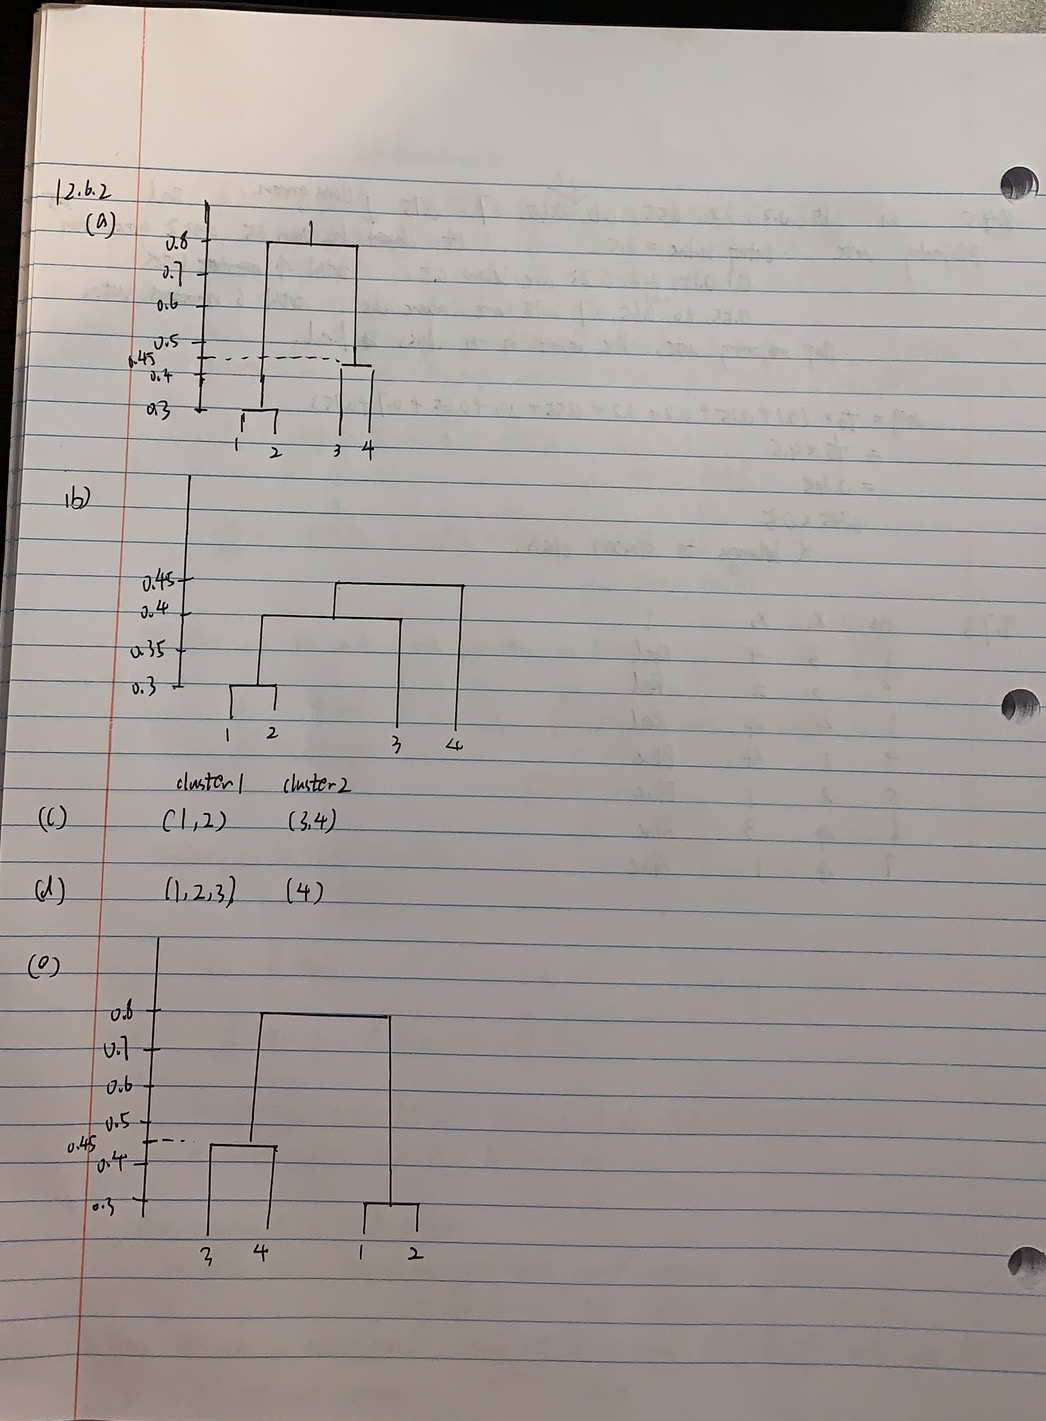

### Reference:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html<br>
https://github.com/SuprajaKrovvidi/DSCI-552-Machine-Learning-for-Data-Science/blob/master/Homework5/notebook/DSCI552_HW5_Ruihao_Wang_9867439484.ipynb<br>
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/<br>
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC<br>
https://github.com/Ajayay/SVM_on_AFFR/blob/master/SVM_on_AFFR.ipynb<br>
https://scikit-learn.sourceforge.net/dev/modules/generated/sklearn.svm.SVC.html<br>